In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\New folder\beer-servings.csv')

In [3]:
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [4]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [5]:
#data=data.drop('Unnamed: 0	'',axis=1') #one way

In [6]:
data=pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\New folder\beer-servings.csv',index_col='Unnamed: 0')  #another way

In [7]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [8]:
data.shape


(193, 6)

In [9]:
data.info()         #we get to know missimg values are there

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [10]:
#identify missing values
data.isna().sum()


country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [11]:
#handle missing values 
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [12]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

In [14]:
#using scikit learn library
from sklearn.impute import SimpleImputer

In [15]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [16]:
imputer=imputer.fit(num_cols)

In [17]:
num_cols=imputer.transform(num_cols)

In [18]:
type(num_cols)       #post transform always will be array , convert to dataframe

numpy.ndarray

In [19]:
num_cols=pd.DataFrame(num_cols,columns=['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'])

In [20]:
type(num_cols)

pandas.core.frame.DataFrame

In [22]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [23]:
data=data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],axis=1)

In [24]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [26]:
data=pd.concat([num_cols,data],axis=1)

In [27]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [28]:
data.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
country                         0
continent                       0
dtype: int64

In [33]:
#using pandas
import matplotlib.pyplot as plt
data1=pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\New folder\beer-servings.csv',index_col='Unnamed: 0')

In [34]:
freq_graph=data1.select_dtypes(include='float')

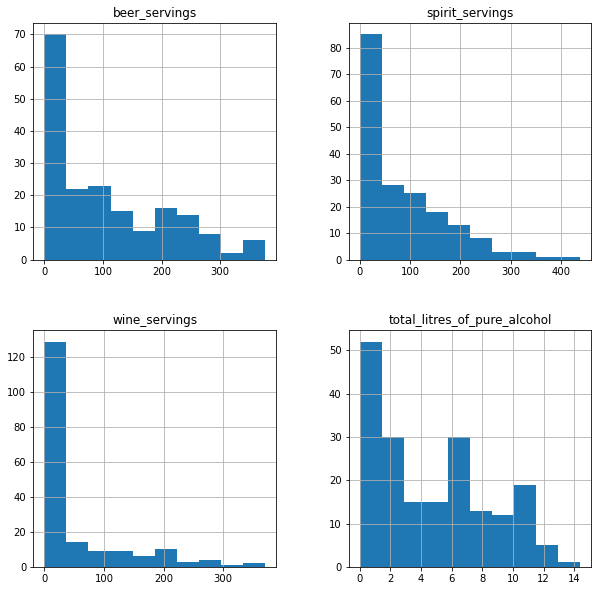

In [35]:
freq_graph.hist(figsize=[10,10])
plt.show()

In [37]:
data1['beer_servings']=data1['beer_servings'].fillna(data1['beer_servings'].median())   #using pandas

In [38]:
data1['beer_servings'].isna().sum()

0

In [39]:
data1.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [40]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:  #for multiple column filling
    data1[i]=data1[i].fillna(data1[i].median())

In [41]:
data1.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

Text(0.5, 1.0, 'Boxplot for beer_servings')

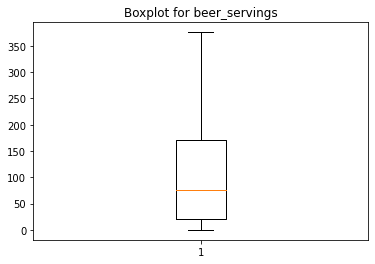

In [42]:
#managing outliers
plt.boxplot(data1['beer_servings'])
plt.title('Boxplot for beer_servings')

Text(0.5, 1.0, 'Boxplot for spirit_servings')

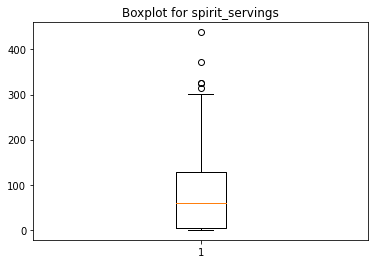

In [43]:
plt.boxplot(data1['spirit_servings'])
plt.title('Boxplot for spirit_servings')

In [44]:
q1=np.percentile(data1['spirit_servings'],25)

In [45]:
q1

5.0

In [46]:
q3=np.percentile(data1['spirit_servings'],75)

In [47]:
q3

128.0

In [48]:
iqr=q3-q1

In [49]:
iqr

123.0

In [50]:
low_limit=q1-1.5*iqr

In [51]:
low_limit

-179.5

In [52]:
upr_limit=q3+1.5*iqr

In [53]:
upr_limit

312.5

In [54]:
outlier=[]
for x in data1['spirit_servings']:
    if x >upr_limit or x<low_limit:
        outlier.append(x)

In [55]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [56]:
ind=data1['spirit_servings']>upr_limit
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [57]:
data1.drop([15, 68, 73, 141, 144],inplace=True)
#data1=data1.drop([15, 68, 73, 141, 144])

In [58]:
data1.shape

(188, 6)

In [59]:
data1       #outliers deleted

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,76.0,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa
